In [108]:
import sqlite3
import pandas as pd

In [109]:
# creating file path
dbfile = 'olist.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(dbfile)

# creating cursor
cur = con.cursor()

# reading all table names
data = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(data)

[('olist_order_customer_dataset',), ('olist_order_dataset',), ('olist_order_reviews_dataset',), ('olist_order_payments_dataset',), ('olist_order_items_dataset',), ('olist_products_dataset',), ('olist_sellers_dataset',), ('olist_geolocation_dataset',), ('product_category_name_translation',)]


In [110]:
data_daerah = pd.read_sql_query('SELECT * FROM olist_geolocation_dataset', con)
data_cust = pd.read_sql_query('SELECT * FROM olist_order_customer_dataset', con)
data_order = pd.read_sql_query('SELECT * FROM olist_order_dataset', con)
data_bayar = pd.read_sql_query('SELECT * FROM olist_order_payments_dataset', con)
data_item = pd.read_sql_query('SELECT * FROM olist_order_items_dataset', con)
data_review = pd.read_sql_query('SELECT * FROM olist_order_reviews_dataset', con)
data_produk = pd.read_sql_query('SELECT * FROM olist_products_dataset', con)
data_penjual = pd.read_sql_query('SELECT * FROM olist_sellers_dataset', con)
data_terjemah = pd.read_sql_query('SELECT * FROM product_category_name_translation', con)

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [112]:
data1 = pd.read_csv('data1.csv') #hasil objective 1
data2 = pd.read_csv('data2.csv') #hasil objective 2
data3 = pd.read_csv('data3.csv') #hasil objective 3

In [113]:
data1

,product_name,jumlah_pembelian
0,bed_bath_table,13665
1,furniture_decor,11540
2,health_beauty,11081
3,sports_leisure,9932
4,computers_accessories,9874
...,...,...
67,arts_and_craftmanship,26
68,la_cuisine,16
69,cds_dvds_musicals,16
70,fashion_childrens_clothes,8


In [114]:
data2

,customer_city,product_name,jumlah_pembelian
0,sao paulo,bed_bath_table,2495
1,sao paulo,health_beauty,2264
2,sao paulo,computers_accessories,1762
3,sao paulo,furniture_decor,1741
4,sao paulo,housewares,1739
...,...,...,...
25702,ze doca,garden_tools,1
25703,ze doca,musical_instruments,1
25704,ze doca,sports_leisure,1
25705,zortea,NaN,1


In [115]:
data3

,waktu,rerata_skor
0,187.0,5.0
1,183.0,5.0
2,172.0,5.0
3,143.0,5.0
4,138.0,5.0
...,...,...
140,73.0,1.0
141,210.0,NaN
142,146.0,NaN
143,102.0,NaN


In [126]:
#data1
data1.dropna(inplace=True)
data1.isna().sum()

product_name        0
jumlah_pembelian    0
dtype: int64

In [127]:
#data 2
data2.dropna(inplace=True)
data2.isna().sum()

customer_city       0
product_name        0
jumlah_pembelian    0
dtype: int64

In [128]:
#data 3 
data3.dropna(inplace=True)
data3.isna().sum()

waktu          0
rerata_skor    0
dtype: int64

In [129]:
#membuat pivot table antara kota dan nama barang sebagai index dan kolom, dan jumlah pembelian sebagai values
data2_pivot = data2.pivot_table(values='jumlah_pembelian', index='customer_city', columns='product_name', aggfunc='sum', fill_value=0) 

#melakukan for loop untuk memperoleh data tiap barang dengan penjualan tertinggi terdapat di kota apa saja
kota = []
barang = []
nilai = []
for i in data2_pivot.columns:
    data2_final = data2_pivot.loc[data2_pivot[f'{i}'] == data2_pivot[f'{i}'].max(), f'{i}']
    kota.append(data2_final.index[0])
    barang.append(i)
    nilai.append(data2_final[0])

#pembuatan data baru yang terdiri dari kota tempat suatu barang terbanyak dibeli 
rekap_segmentasi = pd.DataFrame({'kota': kota,
                   'barang': barang,
                   'jumlah': nilai})

#rekap lebih lanjut, merangkum dalam tiap kota terdapat berapa barang yang terjual paling banyak di kota tersebut
rekap_segmentasi['kota'].value_counts()

sao paulo         62
rio de janeiro     5
diadema            1
itapeva            1
parauapebas        1
brasilia           1
Name: kota, dtype: int64

In [130]:
data2_pivot.dropna(inplace=True)
data2_pivot.isna().sum()
data2_pivot.max()
data2_pivot.index

Index(['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara',
       'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz',
       ...
       'xanxere', 'xapuri', 'xavantina', 'xaxim', 'xexeu', 'xinguara',
       'xique-xique', 'zacarias', 'ze doca', 'zortea'],
      dtype='object', name='customer_city', length=4095)

In [131]:
#missing value data baru
rekap_segmentasi.isna().sum()

kota      0
barang    0
jumlah    0
dtype: int64

In [132]:
#mengecek nilai yang duplikasi
data1.duplicated(keep=False).sum()
data2.duplicated(keep=False).sum()
data3.duplicated(keep=False).sum()

0

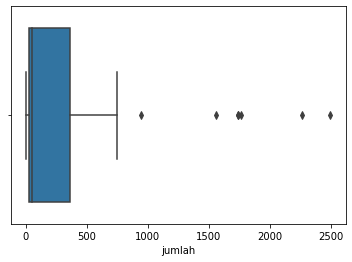

In [133]:
#outliner untuk data2
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

540.75
54.0


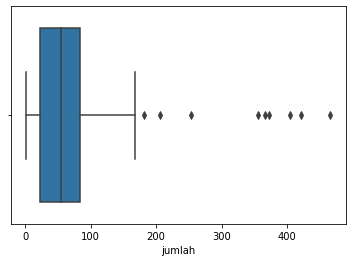

In [134]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

126.0
54.0


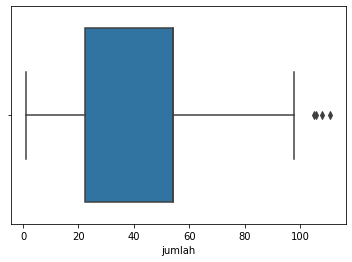

In [135]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

81.0
54.0


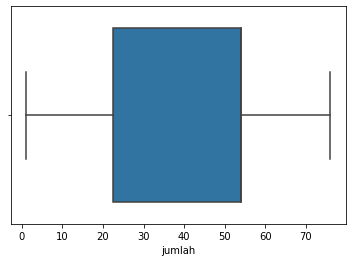

In [136]:
batas_atas = rekap_segmentasi['jumlah'].quantile(q = 0.75) * 1.5
median = rekap_segmentasi['jumlah'].median()
print(batas_atas)
print(median)
rekap_segmentasi.loc[rekap_segmentasi['jumlah'] > batas_atas, 'jumlah'] = median
sns.boxplot(data = rekap_segmentasi, x=rekap_segmentasi['jumlah'])

#data rekap_segmentasi perlu dilakukan penanganan outlier berulang agar benar benar menghilangkan seluruh outliernya

In [137]:
rekap_segmentasi

,kota,barang,jumlah
0,sao paulo,agro_industry_and_commerce,52
1,rio de janeiro,air_conditioning,50
2,sao paulo,art,34
3,diadema,arts_and_craftmanship,3
4,sao paulo,audio,66
...,...,...,...
66,sao paulo,stationery,54
67,sao paulo,tablets_printing_image,10
68,sao paulo,telephony,54
69,sao paulo,toys,54


In [21]:
data2.to_csv('data2_hasil.csv', index=False)

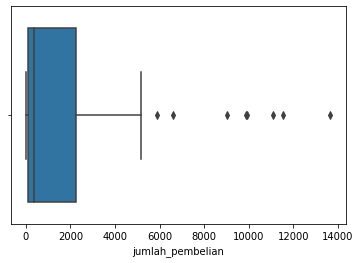

In [138]:
#outliner untuk data1
sns.boxplot(data = data1, x=data1['jumlah_pembelian'])

3407.25
365.0


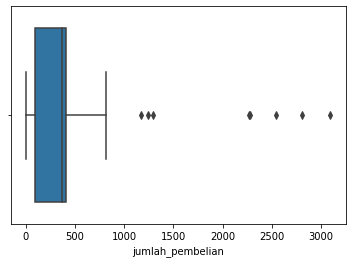

In [139]:
batas_atas = data1['jumlah_pembelian'].quantile(q = 0.75) * 1.5
median = data1['jumlah_pembelian'].median()
print(batas_atas)
print(median)
data1.loc[data1['jumlah_pembelian'] > batas_atas, 'jumlah_pembelian'] = median
sns.boxplot(data = data1, x=data1['jumlah_pembelian'])

611.25
365.0


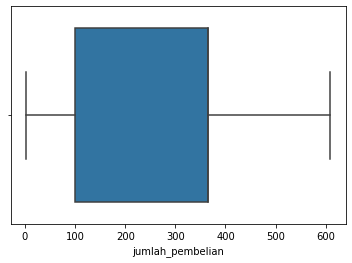

In [140]:
batas_atas = data1['jumlah_pembelian'].quantile(q = 0.75) * 1.5
median = data1['jumlah_pembelian'].median()
print(batas_atas)
print(median)
data1.loc[data1['jumlah_pembelian'] > batas_atas, 'jumlah_pembelian'] = median
sns.boxplot(data = data1, x=data1['jumlah_pembelian'])

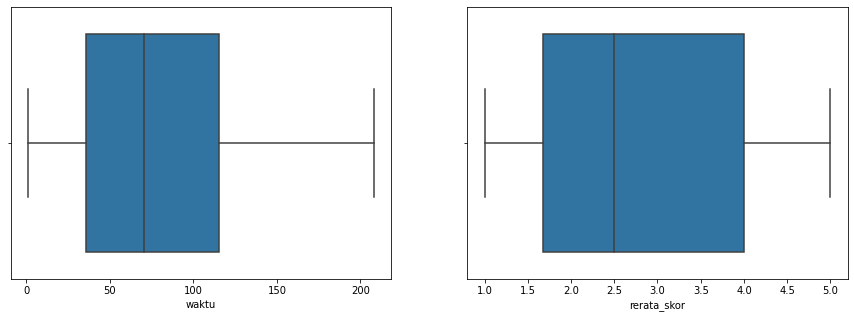

In [141]:
#ouliner untuk data3
fig, ax = plt.subplots(1, 2, figsize=(15, 5))


sns.boxplot(ax=ax[0], data = data3, x=data3['waktu'])
sns.boxplot(ax=ax[1], data = data3, x=data3['rerata_skor'])

In [27]:
#memeriksa inkonsisten data1

print(data1["product_name"].to_string())

0                              bed_bath_table
1                             furniture_decor
2                               health_beauty
3                              sports_leisure
4                       computers_accessories
5                                  housewares
6                               watches_gifts
7                                garden_tools
8                                   telephony
9                                        auto
10                                       toys
11                                 cool_stuff
12                                  perfumery
13                                       baby
14                                electronics
15                                 stationery
16                           office_furniture
17                                   pet_shop
18                   fashion_bags_accessories
20            construction_tools_construction
21                             consoles_games
22                        luggage_

In [28]:
map_inkonsisten = {
    'home_appliances_2': 'home_appliances',
    'home_confort': 'home_comfort',
    'home_comfort_2': 'home_comfort'
}

In [29]:
data1["product_name"].replace(map_inkonsisten)
data1["product_name"] = data1["product_name"].replace(map_inkonsisten)
print(data1["product_name"].to_string())

0                              bed_bath_table
1                             furniture_decor
2                               health_beauty
3                              sports_leisure
4                       computers_accessories
5                                  housewares
6                               watches_gifts
7                                garden_tools
8                                   telephony
9                                        auto
10                                       toys
11                                 cool_stuff
12                                  perfumery
13                                       baby
14                                electronics
15                                 stationery
16                           office_furniture
17                                   pet_shop
18                   fashion_bags_accessories
20            construction_tools_construction
21                             consoles_games
22                        luggage_

In [30]:
data1

,product_name,jumlah_pembelian
0,bed_bath_table,365
1,furniture_decor,365
2,health_beauty,365
3,sports_leisure,365
4,computers_accessories,365
...,...,...
67,arts_and_craftmanship,26
68,la_cuisine,16
69,cds_dvds_musicals,16
70,fashion_childrens_clothes,8


In [31]:
data1.to_csv('data1_hasil.csv', index=False)

In [32]:
data3

,waktu,rerata_skor
0,187.0,5.0
1,183.0,5.0
2,172.0,5.0
3,143.0,5.0
4,138.0,5.0
...,...,...
136,85.0,1.0
137,80.0,1.0
138,78.0,1.0
139,77.0,1.0


In [33]:
data3.to_csv('data3_hasil.csv', index=False)

In [34]:
# membaca data dari file .csv
data = pd.read_csv('data1_hasil.csv')

# menyortir data berdasarkan kolom nilai/angka, mengambil 10 baris dengan nilai terbesar, dan mereset index
sorted_data = data.sort_values(by='jumlah_pembelian', ascending=False).head(10).reset_index(drop=True)

# menyimpan data yang sudah disortir ke dalam file .csv baru
sorted_data.to_csv('data1hasil_chart.csv', index=False)


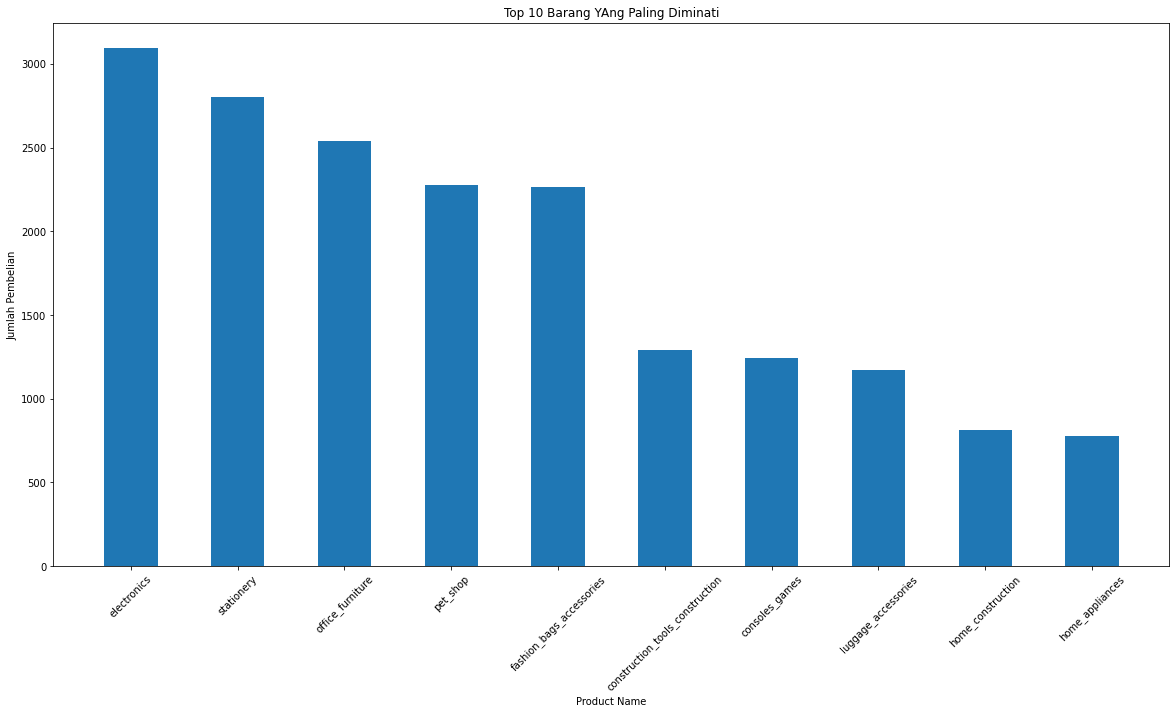

In [35]:
# membaca data dari file .csv
data = pd.read_csv('data1hasil_chart.csv')

# menentukan kolom yang akan diterjemahkan ke dalam bar chart
x = data['product_name']
y = data['jumlah_pembelian']

# membuat objek figure dengan ukuran yang lebih besar
fig = plt.figure(figsize=(20, 10))

# membuat bar chart
plt.bar(data['product_name'], data['jumlah_pembelian'], width=0.5)

# menambahkan label untuk sumbu x dan y
plt.xlabel('Product Name')
plt.ylabel('Jumlah Pembelian')

# menambahkan judul untuk bar chart
plt.title('Top 10 Barang YAng Paling Diminati')

# memiringkan sumbu x
plt.xticks(rotation=45)

# menampilkan bar chart
plt.show()


In [36]:
# membaca data dari file .csv
df = pd.read_csv("data2_hasil.csv")

# mengelompokkan data kolom 1 berdasarkan kolom 2
grouped = df.groupby('customer_city')['jumlah_pembelian'].sum()

# menghitung persentase dari setiap kelompok
grouped = grouped / grouped.sum() * 100

# mengurutkan data dari yang terbesar
grouped = grouped.sort_values(ascending=False)

# mengambil 5 terbanyak
grouped = grouped.head(5)

# menyimpan data ke file .csv baru
grouped.to_csv("data2hasil_chart.csv")


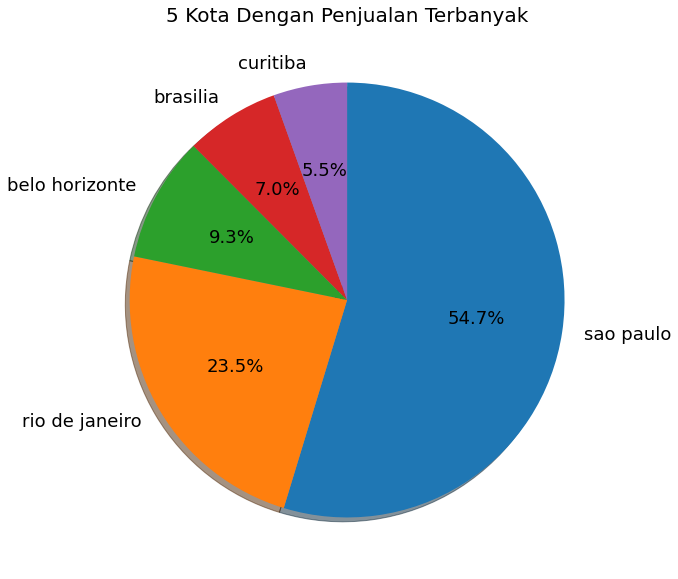

In [37]:
# membaca data dari file .csv
df = pd.read_csv("data2hasil_chart.csv")

# membuat plot pie chart
plt.pie(df['jumlah_pembelian'], labels=df['customer_city'], startangle=90, counterclock=False,
        autopct='%1.1f%%', shadow=True, textprops={'fontsize': 18})

# memberikan title pada plot
plt.title("5 Kota Dengan Penjualan Terbanyak", fontsize=20)

# mengatur ukuran plot
plt.gcf().set_size_inches(10, 10)

# menampilkan plot
plt.show()


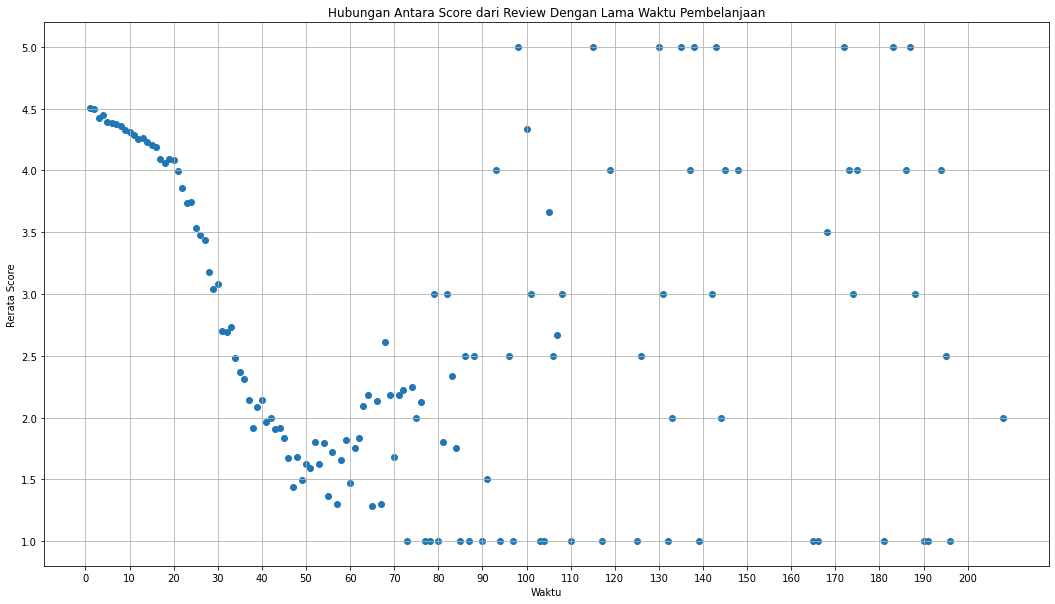

In [38]:
# membaca data dari file .csv
df = pd.read_csv("data3_hasil.csv")

# membuat plot scatter
plt.scatter(df['waktu'], df['rerata_skor'])

# memberikan label pada sumbu x dan y
plt.xlabel("Waktu")
plt.ylabel("Rerata Score")

# memberikan title pada plot
plt.title("Hubungan Antara Score dari Review Dengan Lama Waktu Pembelanjaan")

# memperbesar ukuran gambar
fig = plt.gcf()
fig.set_size_inches(18, 10)

# menambahkan garis grid
plt.grid(True)

# menambahkan interval per 10 pada sumbu x
plt.xticks(range(0, 210, 10))

# menampilkan plot
plt.show()
